In [13]:
from pyscf import gto, scf

# compare energy at each iteration of pyscf and jaxdft; 
# they drifted for some reason. 

# make it easy to compare the two. 

# switching e.g. minao init to "prev dm" changes the ones that converge. 
# this is interesting, because we could then do HPO on dataset and just run it a few times with different options, and take the ones that converges. 

#
# define your molecule and basis set
mol = gto.M(atom='H 0 0 0; H 0 0 0.74; O 1 2 3; F 3 2 1; N 1 1 1;', basis='sto3g')

# define your SCF object and callback function
lst = []
def callback(envs):
    # get the current iteration number and energy
    cycle = envs['cycle']
    energy = envs['e_tot']
    lst.append(energy)


mf = scf.RKS(mol)
mf.callback = callback

# run the SCF calculation
a= mf.kernel(return_dict=True)
print(lst)
print(len(lst))

SCF not converged.
SCF energy = -219.506938115776
[-223.70040983658674, -215.29588925298594, -222.07088428963806, -222.19898849857634, -222.44460769751885, -222.4716176222032, -222.81960364313744, -216.59372083384494, -223.2058439108029, -218.45285332238728, -215.38701061313594, -222.28390212621838, -222.2989022550534, -223.78117990149303, -219.5327790696611, -224.8508707664061, -219.06723553608907, -224.35131664172303, -222.98267760938683, -218.94473397399787, -219.3919488628398, -213.8929268026389, -222.03005642898557, -215.36506268096497, -222.4222782213497, -222.25696906166422, -222.63150432753838, -222.24889570253885, -218.57817694575584, -222.11289579571854, -214.7068500268869, -221.55864637490293, -215.6317178170139, -222.3867400504945, -222.1275592396471, -222.14959502306368, -222.14095913172463, -218.65098432504993, -222.1374998299941, -222.5859748332261, -222.86497146852088, -214.5113405072671, -222.16746188834537, -222.232924533585, -222.2686597519252, -222.25810128225044, -

In [17]:
import pandas as pd 


df = pd.read_csv("../data/generated/test/8_GDB9_f32True_grid0_backendipu_0_55534/data.csv", compression="gzip")

us = df["energies"]
pyscf = df["pyscf_energies"]

# it looks like the first iteration for us goes bad somehow. 



[-32162.00108007 -13353.17573719 -14159.09811415 -14228.40929303
 -14568.86993645 -14456.34827642 -12937.04198881 -11389.73139288
 -14137.57416217 -14338.57435313 -14222.37038636 -13301.33193472
 -13252.05901952 -13840.99425371 -13441.64737811 -14553.14386132
 -13032.35829148 -11632.25400653 -15542.91066682 -13732.74706823
 -14390.07736006 -14443.78045003 -14116.92550017 -14140.20494777
 -14017.68472123 -14627.89295985 -14460.58377432 -14359.79760268
 -14405.63572893 -14396.02846034 -14399.212415   -14399.28943535
 -14398.86675106 -14399.17093284 -14399.15397791 -14399.17069562
 -14399.16666239 -14399.16797476 -14399.16083479 -14399.17212479
 -14399.1639627  -14399.17260107 -14399.16227361 -14399.17039575
 -14399.16329761 -14399.16692953 -14399.16550221 -14399.1679146
 -14399.16692398 -14399.16701983]
[-14386.64835964 -14319.2635421  -14398.45445441 -14398.93634502
 -14399.0912559  -14399.17201177 -14399.17224516 -14399.17230788
 -14399.1723384  -14399.17233996 -14399.17234021 -14399.1

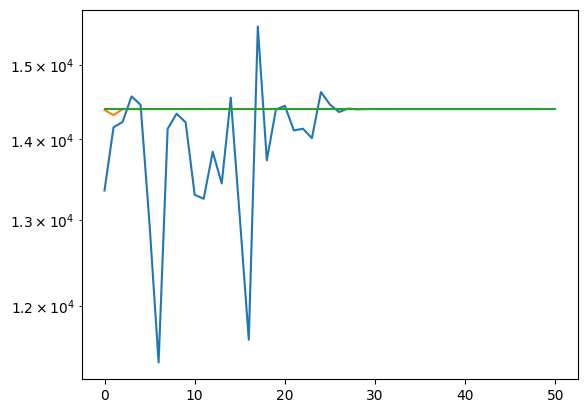

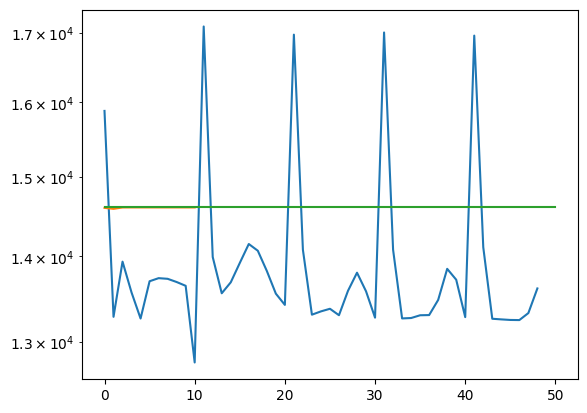

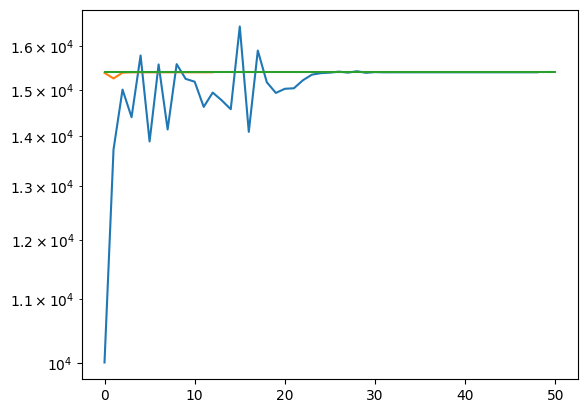

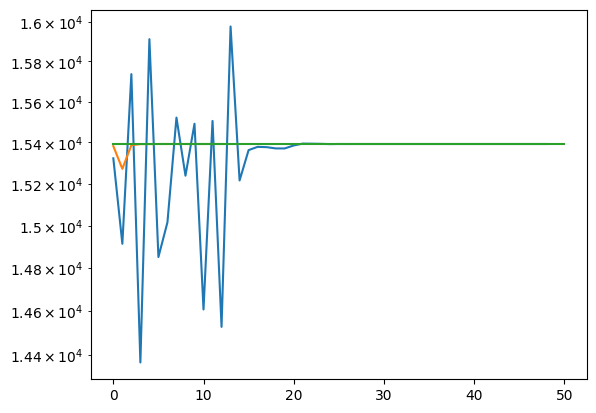

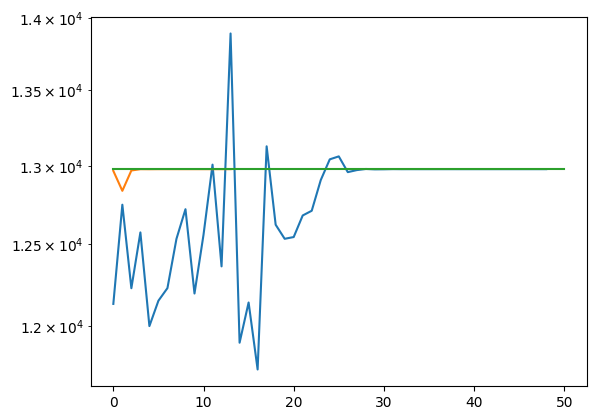

In [25]:
import pandas as pd 


df = pd.read_csv("../data/generated/test/8_GDB9_f32True_grid0_backendipu_0_55534/data.csv", compression="gzip")

us = df["energies"]
pyscf = df["pyscf_energies"]

import matplotlib.pyplot as plt 
import numpy as np 


for i in range(5): 
  fig, ax = plt.subplots()
  us0 = np.fromstring(us[i][1:-1], sep=",", dtype=np.float64)
  py0 = np.fromstring(pyscf[i][1:-1], sep=",", dtype=np.float64)

  # I think we're doing soething bad the first iteration and this causes everything to converge slower and makes numerics much harder! 
  # looks like problem is just that the first iteration goes bad. perhaps this is because of diis? 

  print(us0)
  print(py0)

  plt.plot(-us0[1:])
  plt.plot(-py0)
  plt.plot([0, 50], [-py0[-1], -py0[-1]])
  plt.yscale("log")


In [9]:
_envs

{'mf': RHF object of <class 'pyscf.scf.hf.RHF'>,
 'conv_tol': 1e-08,
 'conv_tol_grad': 9.486832980505139e-05,
 'dump_chk': True,
 'dm0': None,
 'callback': <function __main__.callback(envs)>,
 'conv_check': True,
 'kwargs': {'return_dict': True},
 'cput0': (4.445262964, 1476526.751885677),
 'mol': <pyscf.gto.mole.Mole at 0x7f6714720a30>,
 'dm': NPArrayWithTag([[ 5.99462973e-01,  6.02417129e-01,  1.61636232e-03,
                  -6.31013041e-03, -2.45544582e-03, -4.91089164e-03,
                   7.62940890e-03],
                 [ 6.02417129e-01,  6.05479975e-01, -1.61705065e-04,
                  -5.83987435e-04, -1.04437461e-03, -2.08874922e-03,
                  -4.44283332e-03],
                 [ 1.61636232e-03, -1.61705065e-04,  2.11870778e+00,
                  -5.01504167e-01,  3.47572322e-05,  6.95144645e-05,
                   1.41836426e-05],
                 [-6.31013041e-03, -5.83987435e-04, -5.01504167e-01,
                   2.11870308e+00, -1.36427717e-04, -2.72855433

[-32162.0010048  -13353.18142752 -14159.11037037 -14228.41053518
 -14568.87230177 -14456.35363072 -12937.04273221 -11389.71617923
 -14133.79018115 -14340.23216196 -14222.27876659 -13302.22077713
 -13252.05593447 -13845.86451872 -13441.9254851  -14554.58792948
 -13039.53462719 -11554.31540218 -15542.36967856 -13727.38671771
 -14343.11252489 -14447.3334889  -14151.97452098 -14235.36776823
 -14194.07288044 -14619.42422756 -14465.97982974 -14354.12422804
 -14403.83230265 -14396.47292223 -14398.97972921 -14398.898862
 -14399.24323512 -14399.14060397 -14399.17589865 -14399.1727187
 -14399.1725887  -14399.17219244 -14399.17235693 -14399.17233357
 -14399.17233488 -14399.17233396 -14399.17233467 -14399.1723342
 -14399.17233452 -14399.17233428 -14399.17233453 -14399.17233489
 -14399.17233517 -14399.17233442]
[-14386.64835964 -14319.2635421  -14398.45445441 -14398.93634502
 -14399.0912559  -14399.17201177 -14399.17224516 -14399.17230788
 -14399.1723384  -14399.17233996 -14399.17234021 -14399.1723

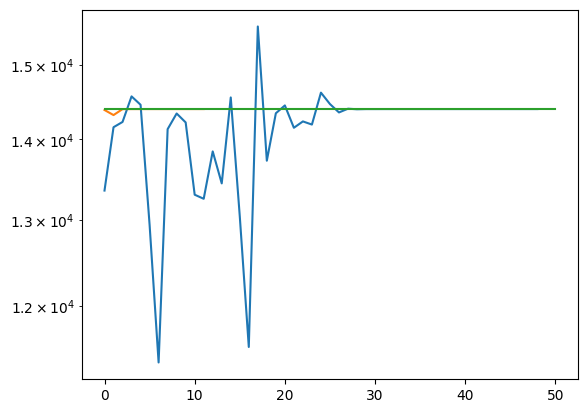

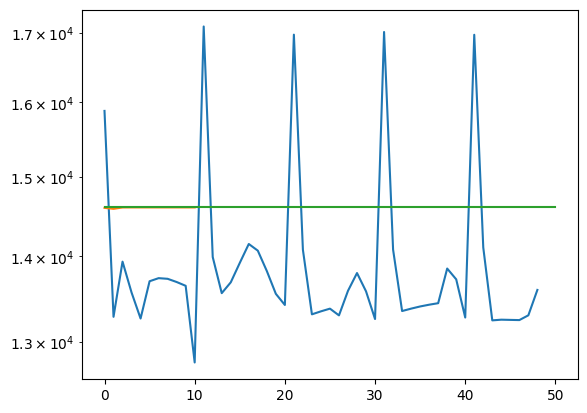

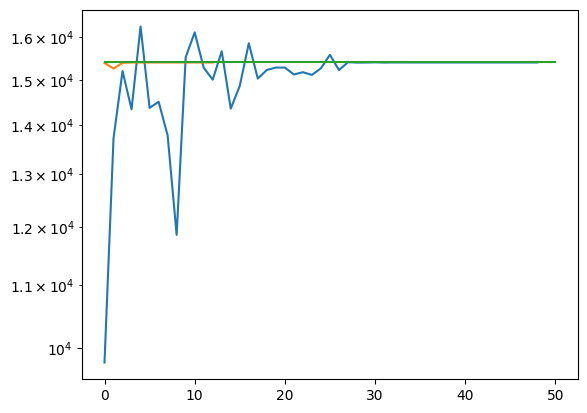

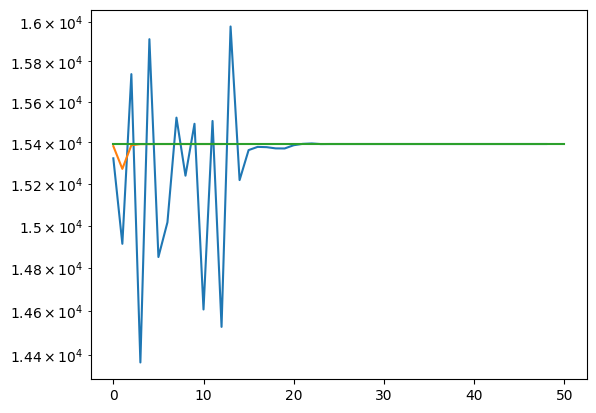

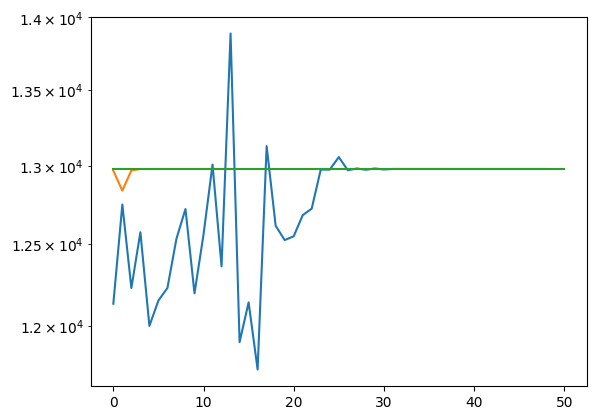

In [26]:
import pandas as pd 


# experiment: 
# what happens if we take all the arguments from PySCF and continue from there? 
# do we then converge the same? 

df = pd.read_csv("../data/generated/test/11_GDB9_f32False_grid0_backendcpu_0_55534/data.csv", compression="gzip")

us = df["energies"]
pyscf = df["pyscf_energies"]

import matplotlib.pyplot as plt 
import numpy as np 


for i in range(5): 
  fig, ax = plt.subplots()
  us0 = np.fromstring(us[i][1:-1], sep=",", dtype=np.float64)
  py0 = np.fromstring(pyscf[i][1:-1], sep=",", dtype=np.float64)

  # I think we're doing soething bad the first iteration and this causes everything to converge slower and makes numerics much harder! 
  # looks like problem is just that the first iteration goes bad. perhaps this is because of diis? 

  print(us0)
  print(py0)

  plt.plot(-us0[1:])
  plt.plot(-py0)
  plt.plot([0, 50], [-py0[-1], -py0[-1]])
  plt.yscale("log")

[-32162.00108007 -13353.17573719 -14159.09811415 -14228.40929303
 -14568.86993645 -14456.34827642 -12937.04198881 -11389.73139288
 -14137.57416217 -14338.57435313 -14222.37038636 -13301.33193472
 -13252.05901952 -13840.99425371 -13441.64737811 -14553.14386132
 -13032.35829148 -11632.25400653 -15542.91066682 -13732.74706823
 -14390.07736006 -14443.78045003 -14116.92550017 -14140.20494777
 -14017.68472123 -14627.89295985 -14460.58377432 -14359.79760268
 -14405.63572893 -14396.02846034 -14399.212415   -14399.28943535
 -14398.86675106 -14399.17093284 -14399.15397791 -14399.17069562
 -14399.16666239 -14399.16797476 -14399.16083479 -14399.17212479
 -14399.1639627  -14399.17260107 -14399.16227361 -14399.17039575
 -14399.16329761 -14399.16692953 -14399.16550221 -14399.1679146
 -14399.16692398 -14399.16701983]
[-14386.64835964 -14319.2635421  -14398.45445441 -14398.93634502
 -14399.0912559  -14399.17201177 -14399.17224516 -14399.17230788
 -14399.1723384  -14399.17233996 -14399.17234021 -14399.1

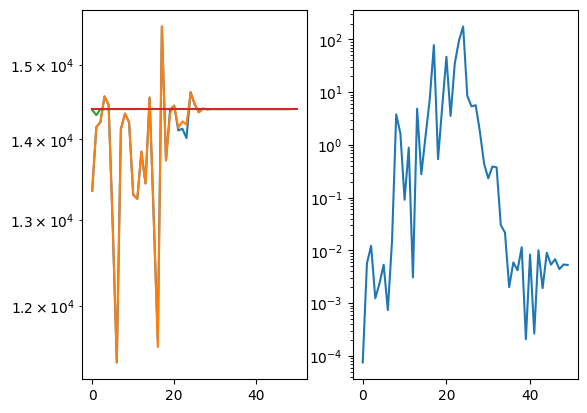

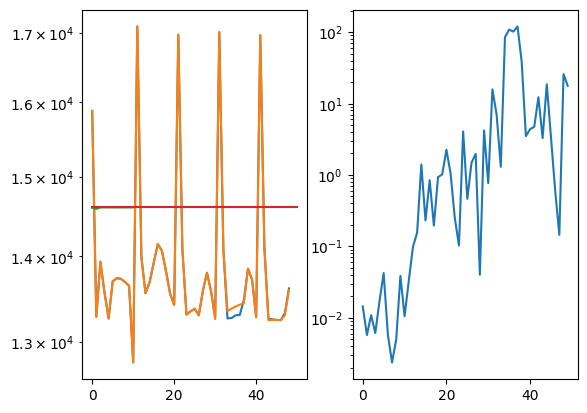

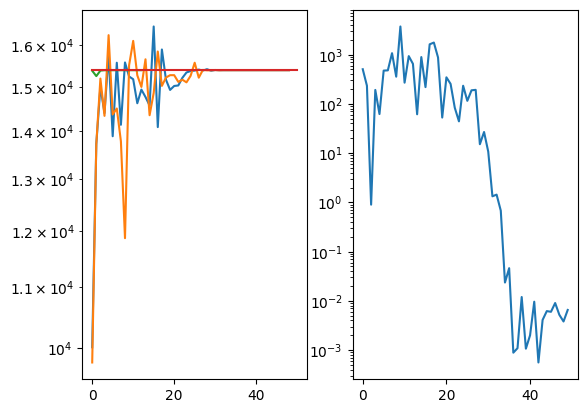

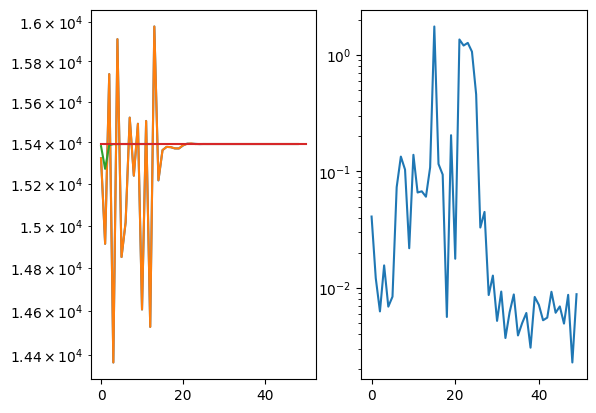

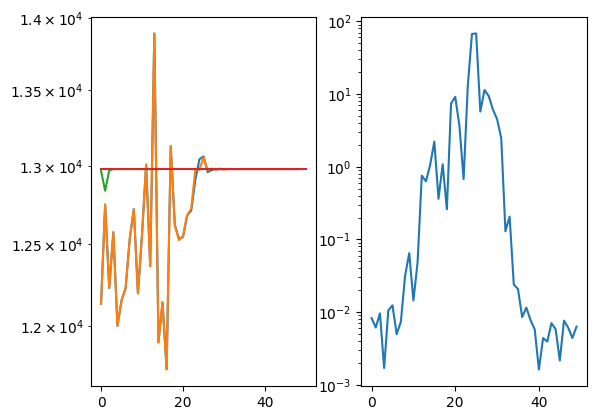

In [31]:
import pandas as pd 


# so IPU f32/ CPU f64 takes almost exactly the same path through the optimization landscape! 
# IPU:    custom integral code, custom ipu mult code 
# CPU64:  uses int2e and einsum for matrix vector mult (or jnp.sum(a*b))
# => difference is not in the part of computation. 
# perhaps it's in the b3lyp stuff?
# perhaps it's in the minao initialization? 

df64 = pd.read_csv("../data/generated/test/11_GDB9_f32False_grid0_backendcpu_0_55534/data.csv", compression="gzip")
df = pd.read_csv("../data/generated/test/8_GDB9_f32True_grid0_backendipu_0_55534/data.csv", compression="gzip")

us64 = df64["energies"]
us = df["energies"]
pyscf = df["pyscf_energies"]

import matplotlib.pyplot as plt 
import numpy as np 



for i in range(5): 
  fig, ax = plt.subplots(1,2)
  us0 = np.fromstring(us[i][1:-1], sep=",", dtype=np.float64)
  us064 = np.fromstring(us64[i][1:-1], sep=",", dtype=np.float64)
  py0 = np.fromstring(pyscf[i][1:-1], sep=",", dtype=np.float64)

  # I think we're doing soething bad the first iteration and this causes everything to converge slower and makes numerics much harder! 
  # looks like problem is just that the first iteration goes bad. perhaps this is because of diis? 

  print(us0)
  print(py0)

  ax[0].plot(-us0[1:])
  ax[0].plot(-us064[1:])
  ax[0].plot(-py0)
  ax[0].plot([0, 50], [-py0[-1], -py0[-1]])
  ax[0].set_yscale("log")

  ax[1].plot(np.abs(us064-us0))
  ax[1].set_yscale("log")

[-32162.0010048  -14466.93245678 -14543.92041442 -14238.19129917
 -15315.16890977 -13659.86162176 -16172.77119563 -13523.06091619
 -16499.1719338  -13579.84095309 -16496.94919776 -13582.64685957
 -16495.52184566 -13583.38308621 -16495.02771853 -13583.58946202
 -16494.87747467 -13583.64986177 -16494.83267593 -13583.66769107
 -16494.81938492 -13583.67296541 -16494.81544737 -13583.67452664
 -16494.81428135 -13583.67498885 -16494.81393609 -13583.6751257
 -16494.81383387 -13583.67516622 -16494.8138036  -13583.67517821
 -16494.81379464 -13583.67518177 -16494.81379199 -13583.67518282
 -16494.8137912  -13583.67518313 -16494.81379097 -13583.67518322
 -16494.8137909  -13583.67518325 -16494.81379088 -13583.67518326
 -16494.81379088 -13583.67518326 -16494.81379087 -13583.67518326
 -16494.81379087 -13583.67518326]
[-14386.64835964 -14319.2635421  -14244.92361234 -13504.33542274
 -13487.5864223  -13328.56711261 -12887.38045053 -13282.54807745
 -12893.01130801 -13278.57936124 -12894.05913304 -13276.1

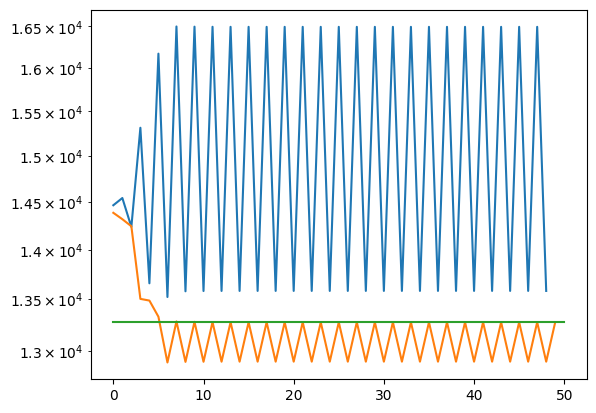

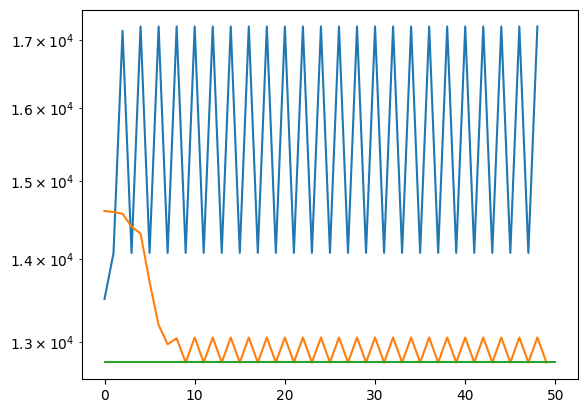

In [35]:
import pandas as pd 


df = pd.read_csv("../data/generated/test/12_GDB9_f32False_grid0_backendcpu_0_55534/data.csv", compression="gzip")

us = df["energies"]
pyscf = df["pyscf_energies"]

import matplotlib.pyplot as plt 
import numpy as np 


for i in range(2): 
  fig, ax = plt.subplots()
  us0 = np.fromstring(us[i][1:-1], sep=",", dtype=np.float64)
  py0 = np.fromstring(pyscf[i][1:-1], sep=",", dtype=np.float64)

  # I think we're doing soething bad the first iteration and this causes everything to converge slower and makes numerics much harder! 
  # looks like problem is just that the first iteration goes bad. perhaps this is because of diis? 

  # turning off diss; these are both f64 

  print(us0)
  print(py0)

  plt.plot(-us0[1:])
  plt.plot(-py0)
  plt.plot([0, 50], [-py0[-1], -py0[-1]])
  plt.yscale("log")

In [37]:
import pandas as pd 


df = pd.read_csv("../data/generated/test/13_GDB9_f32True_grid0_backendcpu_0_55534/data.csv", compression="gzip")

us = df["energies"]
pyscf = df["pyscf_energies"]

import matplotlib.pyplot as plt 
import numpy as np 


for i in range(2): 
  fig, ax = plt.subplots()
  us0 = np.fromstring(us[i][1:-1], sep=",", dtype=np.float64)
  py0 = np.fromstring(pyscf[i][1:-1], sep=",", dtype=np.float64)

  # I think we're doing soething bad the first iteration and this causes everything to converge slower and makes numerics much harder! 
  # looks like problem is just that the first iteration goes bad. perhaps this is because of diis? 

  # turning off diss; we do f32 here. 
  # so they take different paths to the same optimum; and f64 is also wrong when f32 is wrong.
  # this is good news, basically means if we fix this difference we might get f32 to work in all cases, and converge much much faster, perhaps 10 steps! 
  # that's basically a 5x speedup! 

  print(us0)
  print(py0)

  plt.plot(-us0[1:])
  plt.plot(-py0)
  plt.plot([0, 50], [-py0[-1], -py0[-1]])
  plt.yscale("log")

FileNotFoundError: [Errno 2] No such file or directory: '../data/generated/test/13_GDB9_f32True_grid0_backendcpu_0_55534/data.csv'

In [ ]:
# hypothesis
# 1. DIIS
# 2. xc
# 3. generalized eigh 


# we can turn of DIIS
# if we do forloop we can 
# 1. use xc from pyscf! 
# 2. use generalized eigh from scipy.linalg.eigh


# new hypothesis
# 4. it's how we flipped eigh from start to end of SCF iteration, see https://colab.research.google.com/drive/1alwGruFw7CZHt79AQphsuYnk4PE0wleU#scrollTo=0i4A0RKBcU0f step1


# experiment; in [jaxscf] colab, compare step 1 against step20 (which has jax.lax.foriloop)